# MNIST Dataset Classification with Tensorflow

The goal of this lecture is to implement a deep neural network that classifies images of handwritten digits from the MNIST dataset (LeCun & Cortes, 2010) using a multinomial logistic regression in Tensorflow.

---
### Course of Action

* Please write all executable python code in ```Code```-Cells (```Cell```->```Cell Type```->```Code```) and all Text as [Markdown](http://commonmark.org/help/) in ```Markdown```-Cells
* Describe your thinking and your decisions (where appropriate) in an extra Markdown Cell or via Python comments
* In general: discuss all your results and comment on them (are they good/bad/unexpected, could they be improved, how?, etc.). Furthermore, visualise your data (input and output).
* Write a short general conclusion at the end of the notebook
* Further experiments are encouraged. However, don't forget to comment on your reasoning.
* Use a scientific approach for all experiments (i.e. develop a hypothesis or concrete question, make observations, evaluate results)

### Submission

E-Mail your complete Notebook to [maucher@hdm-stuttgart.de](mailto:maucher@hdm-stuttgart.de) until the start of the next lecture. One Notebook per Group is enough. Edit the teammember table below.

**Important**: Also attach a HTML version of your notebook (```File```->```Download as```->```HTML```) in addition to the ```.ipynb```-File.

| Teammember |                    |
|------------|--------------------|
| 1.         | Christopher Caldwell |
| 2.         | Fabian Müller      |
| 3.         | An Dang         |

## Prerequisities
1. Make sure you have a general understanding how a multilayer perceptron can be used for classification into $K > 2$ classes. A good practice-oriented overview of the theory is given in the [MLP Notebook](http://nbviewer.jupyter.org/urls/maucher.home.hdm-stuttgart.de/nb/ML/MLP.ipynb) from the [Machine Learning](http://maucher.pages.mi.hdm-stuttgart.de/ai/page/ml/) lecture. Specifically make sure you understand the following concepts:
    * connection between layers and weight-matrices, bias-vectors & activation-functions
    * cross-entropy error-function
    * gradient-descent learning
    * mini-batch learning

2. Make sure to have the following python libraries installed (e.g. via ```pip install```)
    * tensorflow
    * numpy
    * matplotlib

## Getting to know the dataset
The MNIST dataset is the "Hello World" of machine learning. It consists of 70.000 hand-written, labeled digits which Tensorflow splits it into 55.000 samples for training, 5.000 samples for validation and 10.000 samples for testing.

Lets start by loading the dataset. The ```tf.keras.datasets.mnist``` package gives access to the dataset with a predetermined train / test split

In [1]:
from tensorflow.keras.datasets.mnist import load_data
(train_X, train_y),(test_X, test_y) = load_data()

To visualize the data of the dataset, matplotlib's [```imshow()```](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html) function can be used. Each image is a 2D tensor with dimension $ 28^2=784 $px and uint8 values between 0 and 255 (8-bit grayscale).

(28, 28)
uint8


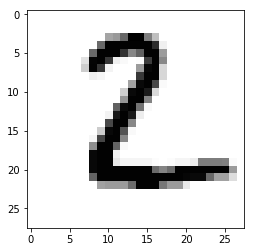

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


image = test_X[1].reshape((28, 28))
print(image.shape)
print(image.dtype)
plt.imshow(image, cmap='Greys')

In [3]:
test_X[4].shape

(28, 28)

In [4]:
train_X.shape

(60000, 28, 28)

The labels are integers representing the written digit

In [5]:
label = test_y[1]
print(label)
type(label)


2


numpy.uint8

## Building the model

A simple model that can be used to classify MNIST images is depicted in the figure below. The model takes the *flat* input image $X$ (the 1D tensors) in its input layer, has one hidden layer with 100 neurons and a rectifier activation function, and a outputlayer with 10 neurons (one for each possible digit). The activation function of the outputlayer is a softmax-function. Therefore, each neuron of the output layer outputs the probability $p(y=j|X)$ that the current input $X$ belongs to the class $j$ represented by this neuron.


![svg image](data:image/svg+xml,%3C%21DOCTYPE%20svg%20PUBLIC%20%22-%2F%2FW3C%2F%2FDTD%20SVG%201.1%2F%2FEN%22%20%22http%3A%2F%2Fwww.w3.org%2FGraphics%2FSVG%2F1.1%2FDTD%2Fsvg11.dtd%22%3E%0D%0A%3Csvg%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%20width%3D%22521px%22%20height%3D%22391px%22%20version%3D%221.1%22%3E%3Cdefs%2F%3E%3Cg%20transform%3D%22translate%280.5%2C0.5%29%22%3E%3Cpath%20d%3D%22M%2050.19%2024.86%20L%20223.91%2053.81%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%2054.67%20L%20221.61%2056.97%20L%20223.91%2053.81%20L%20222.76%2050.07%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28132.5%2C31.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E1%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2024.86%20L%20225.3%20170.78%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.33%20174.14%20L%20221.71%20172.35%20L%20225.3%20170.78%20L%20226.19%20166.97%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28108.5%2C76.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E1%2C3%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2024.86%20L%20224.49%20112.01%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%20114.36%20L%20221.36%20114.36%20L%20224.49%20112.01%20L%20224.49%20108.1%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28112.5%2C53.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E1%2C2%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2024.86%20L%20226.66%20289.56%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.57%20293.93%20L%20222.78%20290.04%20L%20226.66%20289.56%20L%20228.6%20286.16%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%2225%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2817.5%2C17.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2214%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2015px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2084.86%20L%20223.91%20113.81%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20114.67%20L%20221.61%20116.97%20L%20223.91%20113.81%20L%20222.76%20110.07%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%2084.86%20L%20224.49%20172.01%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%20174.36%20L%20221.36%20174.36%20L%20224.49%20172.01%20L%20224.49%20168.1%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%2084.86%20L%20223.91%2055.9%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%2055.04%20L%20222.76%2059.64%20L%20223.91%2055.9%20L%20221.61%2052.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28157.5%2C58.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E2%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%2084.86%20L%20226.05%20290.02%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.46%20294.01%20L%20222.25%20290.97%20L%20226.05%20290.02%20L%20227.56%20286.42%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%2285%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2817.5%2C77.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2214%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2015px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E2%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%20144.86%20L%20223.91%20173.81%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20174.67%20L%20221.61%20176.97%20L%20223.91%20173.81%20L%20222.76%20170.07%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20144.86%20L%20223.91%20115.9%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20115.04%20L%20222.76%20119.64%20L%20223.91%20115.9%20L%20221.61%20112.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20144.86%20L%20224.49%2057.7%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%2055.36%20L%20224.49%2061.62%20L%20224.49%2057.7%20L%20221.36%2055.36%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20144.86%20L%20225.3%20290.78%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.33%20294.14%20L%20221.71%20292.35%20L%20225.3%20290.78%20L%20226.19%20286.97%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%22145%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2817.5%2C137.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2214%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2015px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E3%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%20204.86%20L%20225.3%2058.93%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.33%2055.57%20L%20226.19%2062.74%20L%20225.3%2058.93%20L%20221.71%2057.37%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20204.86%20L%20224.49%20117.7%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%20115.36%20L%20224.49%20121.62%20L%20224.49%20117.7%20L%20221.36%20115.36%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20204.86%20L%20223.91%20175.9%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20175.04%20L%20222.76%20179.64%20L%20223.91%20175.9%20L%20221.61%20172.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20204.86%20L%20224.49%20292.01%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.19%20294.36%20L%20221.36%20294.36%20L%20224.49%20292.01%20L%20224.49%20288.1%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%22205%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2817.5%2C197.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2214%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2015px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E4%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%20324.86%20L%20225.3%20178.93%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.33%20175.57%20L%20226.19%20182.74%20L%20225.3%20178.93%20L%20221.71%20177.37%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20324.86%20L%20223.91%20295.9%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.09%20295.04%20L%20222.76%20299.64%20L%20223.91%20295.9%20L%20221.61%20292.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2878.5%2C306.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2252%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew1%3Csub%3E784%2C100%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2226%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3Ew1%26lt%3Bsub%26gt%3B784%2C100%26lt%3B%2Fsub%26gt%3B%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%2050.19%20324.86%20L%20226.05%20119.69%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.46%20115.71%20L%20227.56%20123.3%20L%20226.05%20119.69%20L%20222.25%20118.74%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%2050.19%20324.86%20L%20226.66%2060.16%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.57%2055.79%20L%20228.6%2063.55%20L%20226.66%2060.16%20L%20222.78%2059.67%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%2225%22%20cy%3D%22325%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%2811.5%2C317.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2225%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2026px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3EX%3Csub%3E784%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2213%22%20y%3D%2213%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%2054.86%20L%20465.92%20260.14%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.44%20264.03%20L%20462.15%20261.19%20L%20465.92%20260.14%20L%20467.34%20256.49%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%2054.86%20L%20464.44%20142.13%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.18%20144.38%20L%20461.36%20144.55%20L%20464.44%20142.13%20L%20464.35%20138.22%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28335.5%2C81.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E1%2C2%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%2054.86%20L%20463.9%2083.86%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%2084.68%20L%20461.63%2087.05%20L%20463.9%2083.86%20L%20462.72%2080.13%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28361.5%2C61.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E1%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22255%22%20cy%3D%2255%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28248.5%2C39.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eh%3Csub%3E1%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%20114.86%20L%20465.19%20260.91%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.31%20264.16%20L%20461.65%20262.57%20L%20465.19%20260.91%20L%20465.99%20257.08%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20114.86%20L%20463.9%20143.86%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%20144.68%20L%20461.63%20147.05%20L%20463.9%20143.86%20L%20462.72%20140.13%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20114.86%20L%20463.9%2085.85%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%2085.03%20L%20462.72%2089.58%20L%20463.9%2085.85%20L%20461.63%2082.67%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28295.5%2C101.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2229%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E2%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22255%22%20cy%3D%22115%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28248.5%2C99.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eh%3Csub%3E2%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%20174.86%20L%20464.44%20262.13%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.18%20264.38%20L%20461.36%20264.55%20L%20464.44%20262.13%20L%20464.35%20258.22%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20174.86%20L%20463.9%20145.85%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%20145.03%20L%20462.72%20149.58%20L%20463.9%20145.85%20L%20461.63%20142.67%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20174.86%20L%20464.44%2087.58%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.18%2085.34%20L%20464.35%2091.5%20L%20464.44%2087.58%20L%20461.36%2085.17%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%22255%22%20cy%3D%22175%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28248.5%2C159.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eh%3Csub%3E3%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%20294.86%20L%20463.9%20265.85%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.09%20265.03%20L%20462.72%20269.58%20L%20463.9%20265.85%20L%20461.63%20262.67%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28336.5%2C272.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2246%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E100%2C10%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2223%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3Ew2%26lt%3Bsub%26gt%3B100%2C10%26lt%3B%2Fsub%26gt%3B%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20280.19%20294.86%20L%20465.19%20148.8%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.31%20145.55%20L%20465.99%20152.63%20L%20465.19%20148.8%20L%20461.65%20147.14%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20280.19%20294.86%20L%20465.92%2089.58%22%20fill%3D%22none%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.44%2085.69%20L%20467.34%2093.23%20L%20465.92%2089.58%20L%20462.15%2088.53%20Z%22%20fill%3D%22%2382b366%22%20stroke%3D%22%2382b366%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28316.5%2C229.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2240%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28151%2C%20208%2C%20119%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Ew2%3Csub%3E100%2C1%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2220%22%20y%3D%2213%22%20fill%3D%22%2397D077%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22255%22%20cy%3D%22295%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28242.5%2C279.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2223%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2024px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eh%3Csub%3E100%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2212%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cg%20transform%3D%22translate%2819.5%2C255.5%29rotate%2890%2C10.5%2C14%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2221%22%20height%3D%2228%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2022px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3E%3Cfont%20style%3D%22font-size%3A%2025px%22%3E...%3C%2Ffont%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2211%22%20y%3D%2220%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cg%20transform%3D%22translate%28249.5%2C225.5%29rotate%2890%2C10.5%2C14%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2221%22%20height%3D%2228%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2022px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3E%3Cfont%20style%3D%22font-size%3A%2025px%22%3E...%3C%2Ffont%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2211%22%20y%3D%2220%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22495%22%20cy%3D%2285%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28488.5%2C69.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Ey%3Csub%3E1%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22495%22%20cy%3D%22145%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28488.5%2C129.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2212%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2013px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Ey%3Csub%3E2%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%226%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22495%22%20cy%3D%22265%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23ffffff%22%20stroke%3D%22%23000000%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28485.5%2C249.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2217%22%20height%3D%2230%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2018px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Ey%3Csub%3E10%3C%2Fsub%3E%3Cdiv%3E%3Csub%3E%3Cbr%20%2F%3E%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%229%22%20y%3D%2221%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cg%20transform%3D%22translate%28489.5%2C195.5%29rotate%2890%2C10.5%2C14%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2221%22%20height%3D%2228%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%280%2C%200%2C%200%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2022px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3E%3Cfont%20style%3D%22font-size%3A%2025px%22%3E...%3C%2Ffont%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2211%22%20y%3D%2220%22%20fill%3D%22%23000000%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20144.95%20340.1%20L%20224.57%20297.84%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.2%20295.38%20L%20224.66%20301.75%20L%20224.57%20297.84%20L%20221.38%20295.57%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28166.5%2C318.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2230%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Eb1%3Csub%3E100%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2215%22%20y%3D%2213%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20144.95%20340.1%20L%20227.27%20180.52%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.68%20175.85%20L%20229.58%20183.68%20L%20227.27%20180.52%20L%20223.36%20180.47%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28166.5%2C274.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2219%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Eb1%3Csub%3E3%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2210%22%20y%3D%2213%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20144.95%20340.1%20L%20227.94%20120.81%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.79%20115.9%20L%20230.59%20123.69%20L%20227.94%20120.81%20L%20224.04%20121.21%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20144.95%20340.1%20L%20228.37%2060.96%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20229.87%2055.93%20L%20231.22%2063.64%20L%20228.37%2060.96%20L%20224.51%2061.63%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cellipse%20cx%3D%22145%22%20cy%3D%22365%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23dae8fc%22%20stroke%3D%22%236c8ebf%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28137.5%2C358.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2213%22%20height%3D%2212%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2014px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eb1%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2212%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3Eb1%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20364.95%20340.1%20L%20467.76%2090.74%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.76%2085.89%20L%20470.33%2093.7%20L%20467.76%2090.74%20L%20463.86%2091.03%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20364.95%20340.1%20L%20467.17%20150.46%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.66%20145.84%20L%20469.42%20153.66%20L%20467.17%20150.46%20L%20463.26%20150.34%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28436.5%2C184.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2219%22%20height%3D%2214%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Eb2%3Csub%3E2%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2210%22%20y%3D%2213%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20364.95%20340.1%20L%20465.01%20268.56%22%20fill%3D%22none%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20469.28%20265.51%20L%20465.62%20272.43%20L%20465.01%20268.56%20L%20461.55%20266.73%20Z%22%20fill%3D%22%236c8ebf%22%20stroke%3D%22%236c8ebf%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28406.5%2C295.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2222%22%20height%3D%2213%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2011px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20white-space%3A%20nowrap%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3Bbackground-color%3A%23ffffff%3B%22%3Eb2%3Csub%3E10%3C%2Fsub%3E%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%2211%22%20y%3D%2212%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2211px%22%20font-family%3D%22Helvetica%22%3E%5BNot%20supported%20by%20viewer%5D%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cellipse%20cx%3D%22365%22%20cy%3D%22365%22%20rx%3D%2225%22%20ry%3D%2225%22%20fill%3D%22%23dae8fc%22%20stroke%3D%22%236c8ebf%22%20pointer-events%3D%22none%22%2F%3E%3Cg%20transform%3D%22translate%28357.5%2C358.5%29%22%3E%3Cswitch%3E%3CforeignObject%20style%3D%22overflow%3Avisible%3B%22%20pointer-events%3D%22all%22%20width%3D%2213%22%20height%3D%2212%22%20requiredFeatures%3D%22http%3A%2F%2Fwww.w3.org%2FTR%2FSVG11%2Ffeature%23Extensibility%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3A%20inline-block%3B%20font-size%3A%2012px%3B%20font-family%3A%20Helvetica%3B%20color%3A%20rgb%28126%2C%20166%2C%20224%29%3B%20line-height%3A%201.2%3B%20vertical-align%3A%20top%3B%20width%3A%2014px%3B%20white-space%3A%20nowrap%3B%20word-wrap%3A%20normal%3B%20text-align%3A%20center%3B%22%3E%3Cdiv%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxhtml%22%20style%3D%22display%3Ainline-block%3Btext-align%3Ainherit%3Btext-decoration%3Ainherit%3B%22%3Eb2%3C%2Fdiv%3E%3C%2Fdiv%3E%3C%2FforeignObject%3E%3Ctext%20x%3D%227%22%20y%3D%2212%22%20fill%3D%22%237EA6E0%22%20text-anchor%3D%22middle%22%20font-size%3D%2212px%22%20font-family%3D%22Helvetica%22%3Eb2%3C%2Ftext%3E%3C%2Fswitch%3E%3C%2Fg%3E%3Cpath%20d%3D%22M%20245%20314%20L%20265%20314%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20255%20319%20L%20255%20295%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20245%20314%20L%20255%20314%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20255%20314%20L%20270%20299%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%20194%20L%20264%20194%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%20199%20L%20254%20175%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%20194%20L%20254%20194%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%20194%20L%20269%20179%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%20134%20L%20264%20134%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%20139%20L%20254%20115%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%20134%20L%20254%20134%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%20134%20L%20269%20119%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%2074%20L%20264%2074%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%2079%20L%20254%2055%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20244%2074%20L%20254%2074%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20254%2074%20L%20269%2059%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20485%20159%20L%20505%20159%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20495%20169%20L%20495%20145%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20484%20166%20L%20487%20165.5%20Q%20490%20165%20495%20158.5%20L%20497.5%20155.25%20Q%20500%20152%20504%20151.5%20L%20508%20151%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20485%2099%20L%20505%2099%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20495%20109%20L%20495%2085%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20484%20106%20L%20487%20105.5%20Q%20490%20105%20495%2098.5%20L%20497.5%2095.25%20Q%20500%2092%20504%2091.5%20L%20508%2091%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20485%20279%20L%20505%20279%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20495%20289%20L%20495%20265%22%20fill%3D%22none%22%20stroke%3D%22%23666666%22%20stroke-miterlimit%3D%2210%22%20stroke-dasharray%3D%223%203%22%20pointer-events%3D%22none%22%2F%3E%3Cpath%20d%3D%22M%20484%20286%20L%20487%20285.5%20Q%20490%20285%20495%20278.5%20L%20497.5%20275.25%20Q%20500%20272%20504%20271.5%20L%20508%20271%22%20fill%3D%22none%22%20stroke%3D%22%23d79b00%22%20stroke-miterlimit%3D%2210%22%20pointer-events%3D%22none%22%2F%3E%3C%2Fg%3E%3C%2Fsvg%3E)


This is an example of a basic multinomial logistic regression using a neural network.

### Tensorflow concepts

In python each line of code is eagerly executed. For example the python code ```5 * 5``` allocates 2 number objects, performs the multiplication and allocates a third object for the result.

In [6]:
5 * 5

25

Highly dynamic and interpreted languages tend to trade computational overhead for usability and therefore they can be slower. This overhead is often negligable, however may be unbearable when doing the *heavy-lifting* that is necessary for deep-learning. Therefore libraries like numpy offer a python interface but use highly-optimized C Code to do the actual work.

In [7]:
np.sum(np.arange(100))

4950

In the example above, however, the result of the ```np.arange()``` method (a list of numbers from 0-100) is made available as python object before it is passed to the ```np.sum()``` method which unpacks the object again. This overhead is still a problem when many operations depend on each other, especially when the result actually needs to be moved between memories (for example when using a GPU for computation). Therefore, Tensorflow takes this concept a step further:

1. create a computation graph that describes all variables, operations and placeholders and how they are connected
2. create a session and feed values into the graph
3. get the output from the computation

Therefore there is no need to move potentially large objects for each operation. Here is a minimal example:

In [8]:
import tensorflow as tf


tf.reset_default_graph()


result = tf.multiply(tf.constant(5), tf.constant(5))

# you can also use overloaded operators in infix notation instead of the arithetic functions
result = tf.constant(5) * tf.constant(5)
print(result)

Tensor("mul_1:0", shape=(), dtype=int32)


Note that when you print the ```result``` variable, you don't get the output of the computation but a [```tf.Operation```](https://www.tensorflow.org/api_docs/python/tf/Operation) you can run in a Tensorflow [```tf.Session```](https://www.tensorflow.org/api_docs/python/tf/Session) to get the actual result.

In [9]:
with tf.Session() as session:
    actual_result = session.run(result)
    print(actual_result)

25


**Hint**: Using the ```with``` statement is an easy way to make sure the session gets closed automatically and all allocated resources are cleaned up. 

### Building the actual Network

A Tensorflow graph is usually build from input to output. To be able to feed data into the graph when running the session, [```placeholder```](https://www.tensorflow.org/api_docs/python/tf/placeholder)s are used. A placeholder needs to have a data-type and a shape. 

For the model you need 2 placeholders:
* ```X``` is used to feed the input data. It has a shape of (?, 28, 28) and the datatype ```tf.float32```
* ```y_target``` is used to feed the label. It therefore has a shape of (?, ) and ```tf.int64``` as datatype

Remeber that our input data are 2-dimensional images with brightness values represented as integers in the interval $\left[ 0, 255\right]$. Thus we need to flatten the images and normalize the input before passing it to subsequent layers. 

#### Tasks:

* Create the two placeholders to input data into the model
* Create operations to preprocess the input data (flatten to 1-dimensional tensors and normalize to the interval $\left[0, 1\right]$. 

**Hint**: The input placeholder expects a $N+1$ input tensor although the data is only $N$-dimensional. The first dimension is used to feed multiple images at once (mini-batch). The ```shape``` parameter can have a single unknown dimension that is either denoted by ```None``` or ```-1```. Although technically optional, the shape parameter should always be specified to allow for easier debugging.

**Hint**: Use a ```tf.variable_scope()``` with the ```with``` statement and name your placeholders. This is useful since Tensorflow has no way of knowing the name of the python variable you assigned the placeholder to. The scope allows namespacing and easier debugging. If you don't specify a name one is automatically created in the form of ```Scope/Placeholder_0:0```

In [10]:
from tensorflow.layers import Flatten



# mlp for Multi Layer Perceptron
with tf.variable_scope("mlp") as mlp_scope:
    
    x = tf.placeholder(tf.float32, shape=(None, 28,28), name="x")
    y_target = tf.placeholder(tf.uint8, shape=(None), name="y_target")
    
    # flatten x
    x_flattened = Flatten()(x)
    
    # normalize x
    x_normalized = x_flattened/255.0
    

In [11]:
print(x_normalized)

Tensor("mlp/truediv:0", shape=(?, 784), dtype=float32)


Now you can build the first layer of the network. To calculate the output of this layer, multiply the input vector $X$ with the weight matrix $w1$ and add the bias vector $b1$. After this, apply the ReLU activation function.

$$ h(X) = relu(X * w1 + b1) $$

First, however, create the weight and bias tensors. Remember that the hidden layer has 100 neurons.

* ```w1``` is a matrix with shape (784, 100) and is initialized with normal-distributed random numbers
* ```b1``` is a vector with shape (100) and is initialized with ```0```

Use the [```tf.Variable```](https://www.tensorflow.org/api_docs/python/tf/Variable) class to create a tensor of variable values ans pass an initializer that creates initial values of the correct shape.

After creating the variables, compute the output of the hidden layer using the [```tf.matmul```](https://www.tensorflow.org/api_docs/python/tf/matmul), [```tf.add```](https://www.tensorflow.org/api_docs/python/tf/add) and [```tf.nn.relu```](https://www.tensorflow.org/api_docs/python/tf/nn/relu) functions.

#### Tasks:

* Create the first network layer that takes the input placeholder as an input and has the specified shape and activation function

**Hint**: Use the [```tf.random_normal```](https://www.tensorflow.org/api_docs/python/tf/random_normal) and [```tf.zeros```](https://www.tensorflow.org/api_docs/python/tf/zeros) function to create the initial values for the variables. 

**Hint**: Since Python 3.5 you can use the [```@``` matrix multiplication operator](https://www.python.org/dev/peps/pep-0465/) with infix notation instead of the ```tf.matmul``` function. 

In [12]:
with tf.variable_scope(mlp_scope):
    w1 = tf.Variable(tf.random_normal(shape=(784,100)), name="w1")
    b1 = tf.Variable(tf.zeros(shape=(100)), name="b1")
    
    #h1 = tf.nn.relu(tf.add(tf.matmul(x,w1),b1))
    h1 = tf.nn.relu((x_normalized@w1)+b1)

Next is the computation of the output layer. The computation is basically equivalent to the previous layer, however the weight-matrix w2 connects the 100-neuron hidden layer with the 10-neuron output layer. Therefore:


* ```w2``` is a matrix with shape (100, 10) and is initialized with normal-distributed random numbers
* ```b1``` is a vector with shape (100) and is initialized with 0

$$ y_{pred}(h(X)) = softmax(h(x) * w2 + b2) $$

#### Tasks:

* Create a second layer in the network that takes the previous output as input and has the specified size


In [13]:
with tf.variable_scope(mlp_scope):
    w2 = tf.Variable(tf.random_normal(shape=(100,10)), name="w2")
    b2 = tf.Variable(tf.zeros(shape=(10)), name="b2")
    
    #logits=tf.add(tf.matmul(h1,w2),b2)
    logits=(h1 @ w2)+b2
    y_pred = tf.nn.softmax(logits)

It is now possible to calculate the loss of the network using [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy). The output of the network predicts the probability of class-affiliation thus the label needs to represents the real probability of class-affiliation (1.0 only for the correct number, 0.0 otherwise). This is commonly referred to as one-hot encoding of the labels (only a single position in the label-vector is 1, all other positions are 0). Since our labels are fed as integers, we need to convert them to a one-hot encoding to represent a valid probability distribution before we can use them in the cross-entropy calculation. This can easily be done one-the-fly using the function [```one_hot```](https://www.tensorflow.org/api_docs/python/tf/one_hot).

Tensorflow has the function [```softmax_cross_entropy_with_logits_v2```](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2) that makes it easy to calculate this loss. To reduce the list of cross-entropies, use [```tf.reduce_mean```](https://www.tensorflow.org/api_docs/python/tf/reduce_mean) to calculate the average loss.

#### Tasks:

* create operations in the compute graph to calculate the cross-entropy and mean-cross-entropy

**Hint**: as the name implies, the function expects [logits (log-odds)](https://en.wikipedia.org/wiki/Logit) as input. Log-odds are the unscaled output of the network before the softmax activation function. Therefore, make sure to **not** call [```tf.nn.softmax```](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) on your output calculation.

In [14]:
# one-hot encoding
y_target_onehot = tf.one_hot(y_target, 10)

In [15]:
# loss 
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_target_onehot, logits=logits))

loss_summary = tf.summary.scalar(name='loss', tensor=loss)

Since you now can compute the loss of the network, you can tune the network parameters (variables), so that this loss is minimized. This is typically done using [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) and [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

To compute the gradients you need to know the derivatives of the loss $L(X)$ with respect to the model parameters (weights, biases) $\theta$ and then perform a training step in the direction of the negative gradient. The step size is defined by an additional parameter $ \eta $.

$$ \Delta w = -\eta \frac{\delta L(X)}{\delta \theta} $$

Luckily Tensorflow already offers [many optimizers](https://www.tensorflow.org/api_guides/python/train#Optimizers) that perform these steps automatically. For the network, use a [```GradientDescentOptimizer```](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) that only expects the learning rate $\eta$ as a parameter. All [```Optimizer```](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer)s have a minimize function that expects the value to minimize and returns an operation that automatically performs the optimization step and adjusts the variables accordingly.

#### Tasks:

* Create the optimize operation using a [```GradientDescentOptimizer```](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) that minimizes the loss of the network

**Hint**: It is also possible to use Tensorflow to manually compute the gradients using the [```tf.gradients```](https://www.tensorflow.org/api_docs/python/tf/gradients) function and implement your own optimizer.

**Hint**: The [```GradientDescentOptimizer```](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) expects either a python float or a 0-dimensional [```Tensor```](https://www.tensorflow.org/programmers_guide/tensors) (scalar) for the ```learning_rate``` parameter. Due to the asynchronous nature of Tensorflow it is not possible to pass a python variable now and expect to adjust it later during training since this would not alter the computation graph. If you want to have a variable training rate you need to define a new [```tf.placeholder```](https://www.tensorflow.org/api_docs/python/tf/placeholder) of type ```tf.float32``` and shape ```()``` (a scalar) and pass it as an argument to the optimizer. This way it is possible to feed in values during training and thus adjust the training rate dynamically. 

In [16]:
with tf.variable_scope(mlp_scope):
    learn_rate = tf.placeholder(tf.float32, shape=None, name="learn_rate")

# optimioze the loss
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

You could now run the optimization operation and feed the training data to the network. However there still is no way of evaluating any result from the network apart from manually checking the output. Since the network is a multinomial classifier, a commonly used metric is the **accuracy** which is defined by the number of correct predicitions divided by the total number of predictions.

$$ acc(X,y) = \frac { 1 }{ N } \sum _{ i=1 }^{ N }{ \begin{cases} 1\ if\ argmax({y_{pred}}_{ i })={ y_{real} }_{ i } \\ 0\ otherwise \end{cases} } $$

where:
* $X$ is a set of training elements and $y$ is the set of labels
* $G(X)$ is the classifier that outputs the log-odds given input $X$ 

#### Tasks:

* Create a new operation in the graph that calculates the accuracy of the network 

**Hint**: You can use the functions [```tf.equal```](https://www.tensorflow.org/api_docs/python/tf/equal) and [```tf.argmax```](https://www.tensorflow.org/api_docs/python/tf/argmax) to generate a vector of boolean values. You can then use the [```tf.reduce_mean```](https://www.tensorflow.org/api_docs/python/tf/reduce_mean) function to calculate the average of the vector. **Note** you need to cast the vector of boolean variables to ```tf.float32``` using the [```tf.cast```](https://www.tensorflow.org/api_docs/python/tf/cast) function before calculating the average.

In [17]:
# calculate accuracy
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_target_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

acc_summary = tf.summary.scalar(name='accuracy', tensor=accuracy)

## Training the Model

Now that you have added all operations that you need to train and evaluate the model to the Tensorflow compute graph, you can train the model in multiple steps using mini-batches of the training set. Remember that you can execute operations in [```Session```](https://www.tensorflow.org/api_docs/python/tf/Session)s. Therefore you first need to create a new session in which an instance of the graph is automatically created.

In the new Session, the weight and bias variables defined earlier are not yet initialized, they only have initialization operations defined. To initialize the variables with the random or constant values, you need to run those operations. Tensorflow has the function [```tf.global_variables_initializer()```](https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer) that collects all variable initializers and combines them into a single operation. This operation can then be run in the session.

#### Tasks:

* Create a new Session and initialize all variables

**Hint**: Mini-batching isn't absolutley necessary since the MNIST dataset fits easily into main-memory and we're training un the CPU. 

**Hint**: Dont create the Session using a ```with``` statement as this would close the Session at the end of the scope. However we need the same session in the next few cells of this notebook, so we need to manually close the session at the end.

In [18]:
#Adding config for GPU - not using all of the GPUs Memory -> leading to crashes
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.4

merged = tf.summary.merge_all()


sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())

You can now run our optimization operation you declared before. Since this operation depends on the ```placeholder```s you defined for the model to feed the input $X$ and labels $y_{real}$ you need to pass those variables using the ```feed_dict``` parameter of the [```run()```](https://www.tensorflow.org/api_docs/python/tf/Session#run) method.

For effective training we feed the model with mini-batches, thus we need to split the data into smaller chunks. Tensorflow offers the [```tf.data.Dataset```](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) API for effective and easy handling of such tasks. Another possibility is to create the batches using slices of the dataset-arrays.

If you used a ```placeholder``` for the ```learning_rate``` parameter of the optimizer, you also need to add it.

#### Tasks:

* Train the model in 10.000 steps using mini-batches with 100 random samples and a learning rate of 0.5
* To see that the model is training successfully, run the accuracy operation every 1.000 steps and feed the test subset of the MNIST dataset 

**Hint**: After ~6.000 Steps the accuracy should approach 93% and stay around that value for the rest of the training. That's the best performance on can expect from such a simple network. A better accuracy could be accomplished, for example, by using a convolutional architecture, but thats out of the scope of this tutorial. 

**Hint**: To create the mini-batches using the ```Dataset``` API, we can create a ```Dataset``` object for our training data tuples that [```repeat```](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#repeat)s after reaching the last element and creates [```batch```](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch)es of a specified number of elements. Then we need to get a [```one-shot iterator```](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#make_one_shot_iterator) and repeatedly call the operation returned by its [```get_next```](https://www.tensorflow.org/api_docs/python/tf/data/Iterator#get_next) method to get the mini batches.

In [19]:
writer = tf.summary.FileWriter('./graphs', sess.graph)

In [21]:
epochs = 10000
batch_size = 100

dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y))

dataset = dataset.repeat().shuffle(len(train_X)).batch(batch_size)

iterator = dataset.make_one_shot_iterator()

nextbatch = iterator.get_next()

tf.set_random_seed(1234)

#sess.run(iterator, feed_dict={x: train_X, y_target: train_y})
for i in range(epochs):
    image_batch, label_batch = sess.run(nextbatch)
    summary, _ = sess.run([merged, optimizer], feed_dict = {x: image_batch, y_target: label_batch, learn_rate:0.5}) 
    
    
    if((i % 1000) == 0):
        test_acc = accuracy.eval(feed_dict={x: test_X, y_target: test_y}, session=sess)
        print(test_acc)
        
        
    
    writer.add_summary(summary, i)
        

0.2133
0.8822
0.9091
0.9199
0.9241
0.9284
0.9353
0.939
0.9408
0.939


Don't forget to close the session after training to free all resources.

In [ ]:
sess.close()

[dataset - minibatch](https://adventuresinmachinelearning.com/tensorflow-dataset-tutorial/)

LeCun, Y., & Cortes, C. (2010). The MNIST database of handwritten digits. Retrieved from http://yann.lecun.com/exdb/mnist

## Further Ideas

### Change the network arcitecture to a convolutional NN

Convolutional neural networks are used in state-of-the art image classifiaction networks. They learn a set of 2-d filters that are applied to the input image to generate meaningful features. 

For a theoretical introduction to how CNNs work, see the [Notebook on CNNs](http://nbviewer.jupyter.org/urls/maucher.home.hdm-stuttgart.de/nb/ML/ConvolutionNeuralNetworks.ipynb) from the Machine Learning lecture.

1. reshape the input data to 2-dimensional 28x28 images
2. replace the input layer with a [conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)
3. add a [dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) layer followed by another conv2d layer and a final dropout layer before feeding the resulting feature maps into to the fully connected layer

### Add data visualization using [tensorboard](https://www.tensorflow.org/get_started/summaries_and_tensorboard)

Sometimes it can be helpful to see what the network isdoing while training. Especially when debugging code or architectures or when optimizing hyperparameters. Tensorflow comes with a visualization system called tensorboard. It can graph different data over time and can give you an overview of your current computation graph. To see if the network would profit from more training steps, graph the loss and the accuracy of the network in a tensorboard graph.

1. add a [tf.summary.scalar](https://www.tensorflow.org/api_docs/python/tf/summary/scalar) node for the loss and accuracy to your current graph
2. use [tf.summary.merge_all()](https://www.tensorflow.org/api_docs/python/tf/summary/merge_all) to create a single op that collects the scalar data.
3. create a [FileWriter](https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter) that writes the summaries to disk
4. run the merged summary op every step and pass the result to the file writer using the add_summary() method
5. start the tensorboard using ```tensorboard --logdir=<path to filewriter out>```
6. open the tensorboard started under [http://localhost:6006](http://localhost:6006)